# Supervised Machine Learning: Regression – Final Assignment

## Imported The Required Libraries For the Project

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib  import style
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

## Importing the Dataset

In [37]:
df = pd.read_csv("insurance.csv")

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [41]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [42]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 1. About The Data: 
#### This project uses the Insurance dataset, which contains 1,338 rows and 7 columns, including both numerical and categorical variables. The dataset includes the following features:
#### * age: Age of the policyholder 
### * sex: Gender (male or female), 
### * bmi: Body mass index ,
### * children:Number of dependents
### * smoker:  Whether the individual is a smoker
### * region: The region where the individual resides (northeast, northwest, southeast, southwest)
### * charges: Medical insurance charges (target variable)
## Also contains a brief exploratory visualization of: 
#### * Graph showing smoking habits and a heat map for correlation to the target


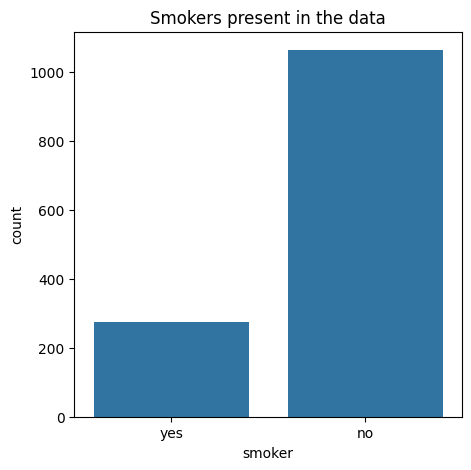

In [43]:
plt.figure(figsize= (5,5))
sns.countplot (x= 'smoker', data = df)
plt.title ("Smokers present in the data")
plt.show()

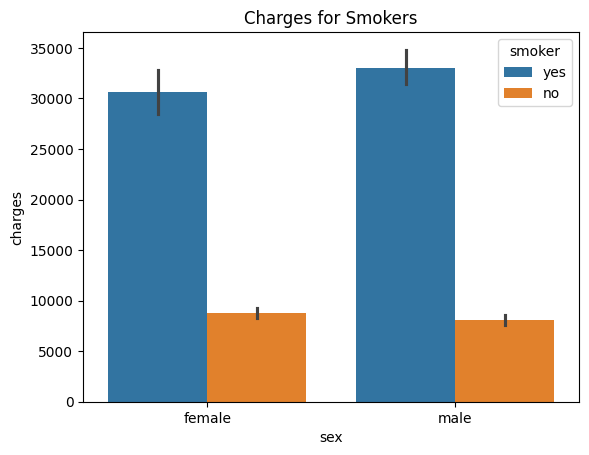

In [44]:
plt.Figure(figsize= (5,5))
sns.barplot(x= "sex", y = 'charges', hue= 'smoker', data= df)
plt.title("Charges for Smokers")
plt.show()

## 2. Objective : 
### The main objective of this project is to predict medical insurance charges based on various demographic and lifestyle factors using different linear regression models.
### The focus is on evaluating which modeling technique provides the most accurate predictions while still being interpretable by stakeholders, such as healthcare providers or insurers.

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [46]:
# well make use of drop_first to avoid multi collinearity 

df_encoded = pd.get_dummies(df, columns= ['sex', 'smoker', 'region'], drop_first= True)

# the output was in form of true and false well have to change that 
bool_cols = df_encoded.select_dtypes(include= 'bool').columns

df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

print(df_encoded.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


#### I explored the data to see which was mostly correlated

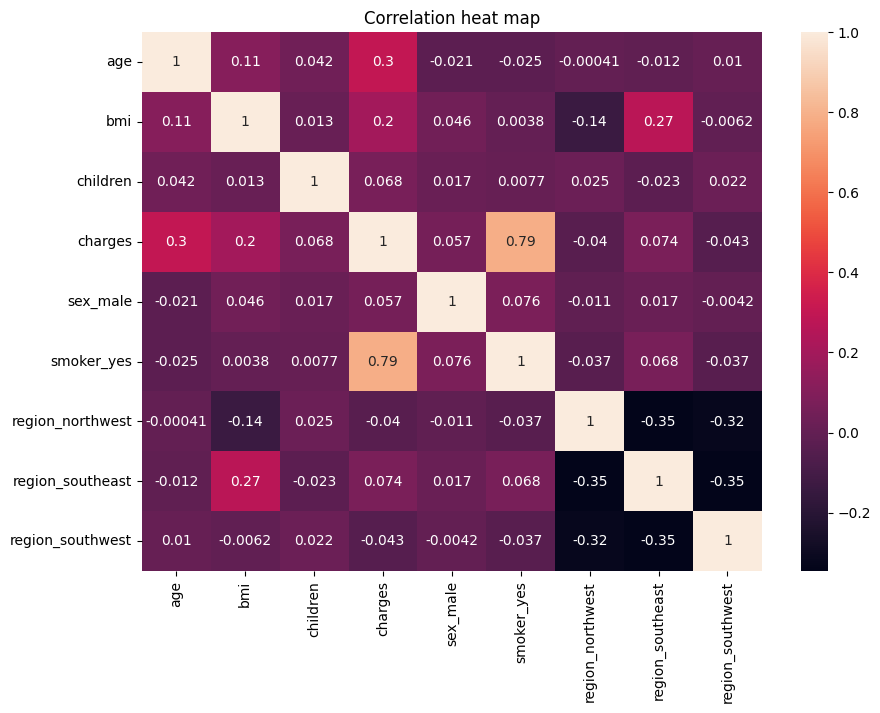

In [172]:
# well plot a heat map to see the correlation with target which is charges in the data 
plt.figure(figsize=(10, 7))
sns.heatmap(df_encoded.corr(), annot= True)
plt.title("Correlation heat map")
plt.show()


In [173]:
# According to the heat map the sex data has a very low correlation to the target which is the charges so well drop charges and see what happens when lasso and ridge meets it 
X = df_encoded.drop('charges', axis= 1)
y = df_encoded ['charges']

## 3. Linear Regression Models
* I trained regression models like Linear, Ridge,Lasso regression and Elastic Net. All models used the same training/test split then, I applied  scale and log-transformed data (log on the target charges) for consistency and better performance.


##### Set up models and parameters

In [174]:
#split the data into 70% for training and 30% for testing 
X_train , X_test, y_train, y_test = train_test_split (X,y, test_size=0.3, random_state= 42)
# lets print the shape of the data to see 
print("X_train: " , X_train.shape )
print("X_train: " , X_test.shape )
print("X_train: " , y_train.shape )
print("X_train: " , y_test.shape )

X_train:  (936, 8)
X_train:  (402, 8)
X_train:  (936,)
X_train:  (402,)


In [175]:
S = StandardScaler()
X_train_S = S.fit_transform(X_train)
X_test_S = S.transform(X_test)
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)


In [184]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_S)  
X_test_poly = poly.transform(X_test_S)  

In [185]:
kf = KFold(n_splits= 5, shuffle= True , random_state= 42)

In [186]:
#We"ll make of hyperparameter tunning 
param_grid = {
    'Lasso': {'alpha': [ 0.01, 0.1, 1, 10]},
    'Ridge' : {'alpha': [ 0.01, 0.1, 1, 10]},
    'ElasticNet':  {
        'alpha': [ 0.01, 0.1, 1, 101],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7]
    },
}


In [207]:
from sklearn.ensemble import RandomForestRegressor
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(max_iter=1000),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(max_iter=1000),
    
    
}

In [188]:
best_models = {}

In [213]:
for name, model in models.items():
    if name == 'LinearRegression':
        model.fit(X_train_S, y_train_log)
        y_pred_log = model.predict(X_test_S)
        y_pred = np.exp(y_pred_log)
        r2 = r2_score(y_test, y_pred)
        best_models[name] = model
        print(f"{name} R² score: {r2:.4f}")

   
    else:
        print(f"\nTuning {name}...")
        grid = GridSearchCV(model, param_grid[name], cv=kf, scoring='r2')
        grid.fit(X_train_poly, y_train_log)  # Use poly features for regularized models
        best_model = grid.best_estimator_
        best_models[name] = best_model
        y_pred_log = best_model.predict(X_test_poly)
        y_pred = np.exp(y_pred_log)
        r2 = r2_score(y_test, y_pred)
        print(f"{name} best params: {grid.best_params_}")
        print(f"{name} R² score: {r2:.4f}")




LinearRegression R² score: 0.6054

Tuning Lasso...
Lasso best params: {'alpha': 0.01}
Lasso R² score: 0.8574

Tuning Ridge...
Ridge best params: {'alpha': 10}
Ridge R² score: 0.8459

Tuning ElasticNet...
ElasticNet best params: {'alpha': 0.01, 'l1_ratio': 0.3}
ElasticNet R² score: 0.8506


### Model Comparison 
* Linear Regression:(Baseline model)= 0.6054 
* Lasso Regression:(L1 regularization with tuning)=  0.8574 
* Ridge Regression: (L2 regularization with tuning)=  0.8459  
* ElasticNet: (Combination of L1 and L2)=  0.8506 


### 4. Insights and Key Findings:
##### - **Smoker status** is the strongest predictor of high charges. Smokers pay significantly more.
##### - **Age** has a strong positive correlation with charges.
##### - **BMI** increases costs, especially with smoking.
##### - **Region** and **number of children** had minor influence.
##### - Log-transforming the target improved model performance.
##### - **Ridge Regression** performed best among linear models.

In [ ]:
#for example 1st with the elastic net  I want to visualize the best predictions of elastic net, ridge regression and lasso regression I have made so far
best_model = best_models['Ridge']
y_pred_log = best_model.predict(X_test_poly)  # Use polynomial features
y_pred = np.exp(y_pred_log) 

# well  plot the graph for the visulization

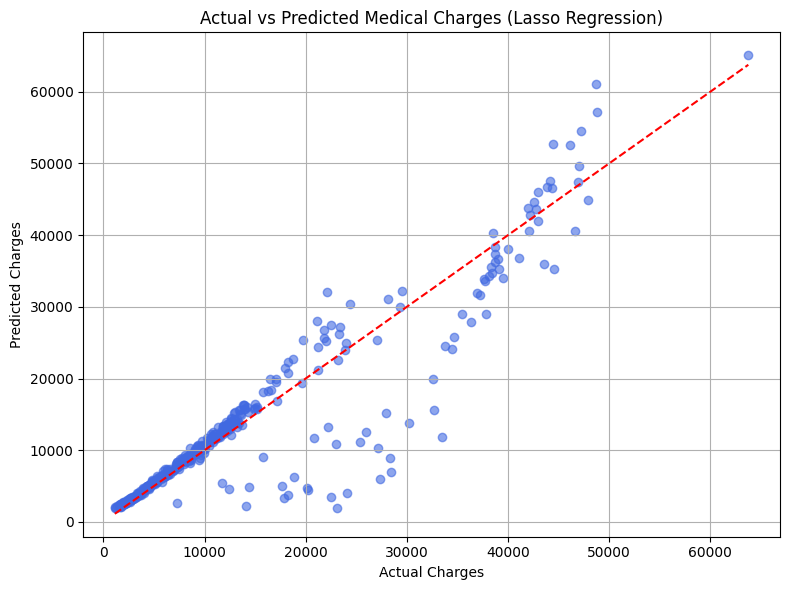

In [223]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Medical Charges (Lasso Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()


# 5. Next Steps
* Feature Engineering: Add features like income, health conditions, or exercise habits.  
* Outlier Handling: Investigate and treat extreme values.  
* Cross-Validation: Try other CV strategies, tune more hyperparameters.  
* Model Alternatives: Explore XGBoost, SVR, or Gradient Boosting.  
* Explainability: Use SHAP values to better explain model outputs to stakeholders.
